In [28]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [29]:
# extra = pd.read_csv('drive/MyDrive/data/answer_metadata_task_3_4.csv')

# merge = pd.merge(left = data, right = extra, how = 'inner', on = 'AnswerId')
# merge = merge.drop(columns=['CorrectAnswer', 'DateAnswered', 'GroupId', 'QuizId', 'SchemeOfWorkId'])
# merge.head()

In [30]:
from scipy.stats import multinomial
quality = data.groupby('QuestionId')['AnswerValue'].apply(lambda x:multinomial.entropy(1,x.value_counts(normalize=True)))
ranking1 = quality.rank(method='first', ascending=False).astype('int16')

quality
# ranking1

QuestionId
0       1.194456119275689
1      0.8760057656431736
2      1.3316632075619683
3      0.6954225533991737
4      1.3243211426168569
              ...        
943    0.9585435938032012
944    1.3124040297960131
945    1.2609343801953017
946    1.2367325970309815
947      1.08261445702246
Name: AnswerValue, Length: 948, dtype: object

In [31]:
data2 = data.groupby('QuestionId')
# data2 = merge.groupby('QuestionId')
data_group = []
for k, df in data2:
  data_group.append({'QuestionId': k, 'Num': len(df), 'IsCorrect_mean': df['IsCorrect'].mean(), 'IsCorrect_sem': df['IsCorrect'].sem(), 'AnswerValue_sem': df['AnswerValue'].sem()})
df_group = pd.DataFrame(data_group)

df_group['entropy'] = quality
df_group['ranking1'] = ranking1

# ranking2 = df_group['IsCorrect_mean'].rank(method='first', ascending=True).astype('int16')
# ranking2
# df_group['ranking2'] = ranking2
df_group

,QuestionId,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,entropy,ranking1
0,0,2812,0.443457,0.009370,0.017857,1.194456119275689,484
1,1,14,0.571429,0.137253,0.163363,0.8760057656431736,844
2,2,2313,0.385214,0.010121,0.020667,1.3316632075619683,124
3,3,2672,0.808757,0.007610,0.011826,0.6954225533991737,908
4,4,1704,0.401408,0.011878,0.024836,1.3243211426168569,150
...,...,...,...,...,...,...,...
943,943,2653,0.566528,0.009623,0.014700,0.9585435938032012,780
944,944,189,0.142857,0.025521,0.080272,1.3124040297960131,188
945,945,2337,0.422336,0.010220,0.020537,1.2609343801953017,331
946,946,111,0.459459,0.047516,0.082819,1.2367325970309815,397


In [32]:
df = df_group.copy()

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df_group)
df_group = min_max_scaler.transform(df_group)

df_group = pd.DataFrame(df_group, columns=df.columns, index=list(df.index.values))
df_group['ranking1'] = quality.rank(method='first', ascending=False).astype('int16')
df_group

# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# fitted = std_scaler.fit(df_group)
# df_group = std_scaler.transform(df_group)

# df_group = pd.DataFrame(df_group, columns=df.columns, index=list(df.index.values))
# df_group['ranking1'] = quality.rank(method='first', ascending=False).astype('int16')
# df_group

,QuestionId,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,entropy,ranking1
0,0.000000,0.948008,0.350699,0.032459,0.020619,0.861618,484
1,0.001056,0.003376,0.500000,0.475457,0.188636,0.631905,844
2,0.002112,0.779541,0.282750,0.035060,0.023864,0.960592,124
3,0.003168,0.900743,0.776884,0.026361,0.013656,0.501641,908
4,0.004224,0.573937,0.301643,0.041147,0.028679,0.955296,150
...,...,...,...,...,...,...,...
943,0.995776,0.894328,0.494283,0.033335,0.016974,0.691443,780
944,0.996832,0.062458,0.000000,0.088408,0.092690,0.946699,188
945,0.997888,0.787643,0.326059,0.035401,0.023714,0.909572,331
946,0.998944,0.036124,0.369369,0.164601,0.095631,0.892114,397


In [33]:
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

In [34]:
eval_validation = pd.read_csv('drive/MyDrive/data/quality_response_remapped_public.csv')
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['preference'] = calc_preference(eval_validation['score'])
eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2


In [35]:
eval_test = pd.read_csv('drive/MyDrive/data/quality_response_remapped_private.csv')
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['preference'] = calc_preference(eval_test['score'])
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,15,15,145,762,2,2,2,2.0,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1,1.2,1
2,25,25,278,195,1,1,1,1.0,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1,1.2,1


In [36]:
template = pd.read_csv('drive/MyDrive/data/template.csv')
template['ranking'] = df_group['ranking1']
# template['ranking'] = df_group['ranking2']
template.head()

,QuestionId,ranking
0,0,484
1,1,844
2,2,124
3,3,908
4,4,150


In [37]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    # print(submission_preference)

    return submission_preference
    
submission_preference = evaluate(eval_validation, template)
print(submission_preference)
print(list(eval_validation['preference']))
correct = 0
for i in range(len(submission_preference)):
  if submission_preference[i] == list(eval_validation['preference'])[i]:
    correct += 1
print(correct / len(submission_preference))


# submission_preference = evaluate(eval_test, template)
# print(submission_preference)
# print(list(eval_test['preference']))
# correct = 0
# for i in range(len(submission_preference)):
#   if submission_preference[i] == list(eval_test['preference'])[i]:
#     correct += 1
# print(correct / len(submission_preference))

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
0.84


In [38]:
select = []
for i in range(len(submission_preference)):
  if submission_preference[i] != list(eval_validation['preference'])[i]:
    # print(i)
    select.append(i)

for i in select:
  left = eval_validation.loc[i, 'left']
  right = eval_validation.loc[i, 'right']
  # print(left, right)
  tmp = df_group.loc[left, 'ranking1']
  df_group.loc[left, 'ranking1'] = df_group.loc[right, 'ranking1']
  df_group.loc[right, 'ranking1'] = tmp

In [39]:
template['ranking'] = df_group['ranking1']

submission_preference = evaluate(eval_validation, template)
print(submission_preference)
print(list(eval_validation['preference']))
correct = 0
for i in range(len(submission_preference)):
  if submission_preference[i] == list(eval_validation['preference'])[i]:
    correct += 1
print(correct / len(submission_preference))

[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
1.0


In [40]:
from sklearn.linear_model import LinearRegression
# X = df_group[['IsCorrect_mean', 'IsCorrect_sem', 'AnswerValue_sem', 'entropy']]
X = df_group[['IsCorrect_mean', 'entropy']]
y = df_group['ranking1']
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(1037.9016500630094, array([  620.94176295, -1006.57281352]))

In [41]:
# df_group['predict'] = lin_reg.predict(df_group.loc[:, ['IsCorrect_mean', 'IsCorrect_sem', 'AnswerValue_sem', 'entropy']])
df_group['predict'] = lin_reg.predict(df_group.loc[:, ['IsCorrect_mean', 'entropy']])
df_group

,QuestionId,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,entropy,ranking1,predict
0,0.000000,0.948008,0.350699,0.032459,0.020619,0.861618,484,388.384329
1,0.001056,0.003376,0.500000,0.475457,0.188636,0.631905,844,712.314554
2,0.002112,0.779541,0.282750,0.035060,0.023864,0.960592,124,246.566988
3,0.003168,0.900743,0.776884,0.026361,0.013656,0.501641,908,1015.362675
4,0.004224,0.573937,0.301643,0.041147,0.028679,0.955296,150,263.629752
...,...,...,...,...,...,...,...,...
943,0.995776,0.894328,0.494283,0.033335,0.016974,0.691443,780,648.834962
944,0.996832,0.062458,0.000000,0.088408,0.092690,0.946699,188,84.979779
945,0.997888,0.787643,0.326059,0.035401,0.023714,0.909572,331,324.814996
946,0.998944,0.036124,0.369369,0.164601,0.095631,0.892114,397,369.280826


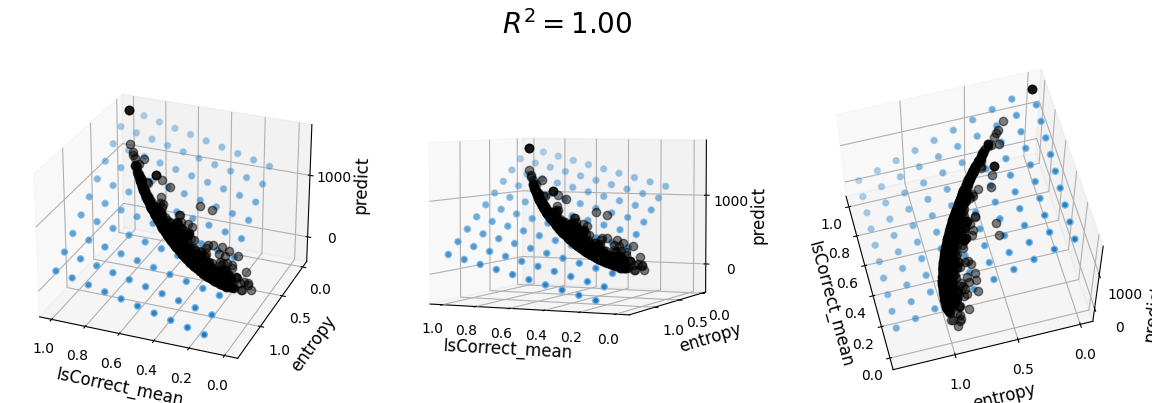

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

X = df_group[['IsCorrect_mean', 'entropy']].values.reshape(-1,2)
Y = df_group['predict']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(df['IsCorrect_mean'].min(), df['IsCorrect_mean'].max(), 10)
y_pred = np.linspace(df['entropy'].min(), df['entropy'].max(), 10)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')
 
fig = plt.figure(figsize=(12, 4))
 
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)         #검은색 마커들
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='#70b3f0')  #파란색 마커들
    ax.set_xlabel('IsCorrect_mean', fontsize=12)  #해당 축을 설명하는 라벨
    ax.set_ylabel('entropy', fontsize=12)
    ax.set_zlabel('predict', fontsize=12)
    ax.locator_params(nbins=6, axis='x')          #해당 축의 구간 개수 (쪼개진 구간도 포함)
    ax.locator_params(nbins=4, axis='y')
    ax.locator_params(nbins=4, axis='z')

#elevation (높이), azimuth (방위각)
ax1.view_init(elev=27, azim=112) 
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
 
fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
 
fig.tight_layout()

In [43]:
df_group['predict_rank'] = df_group['predict'].rank(method='first', ascending=True).astype('int16')
df_group

,QuestionId,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,entropy,ranking1,predict,predict_rank
0,0.000000,0.948008,0.350699,0.032459,0.020619,0.861618,484,388.384329,435
1,0.001056,0.003376,0.500000,0.475457,0.188636,0.631905,844,712.314554,774
2,0.002112,0.779541,0.282750,0.035060,0.023864,0.960592,124,246.566988,191
3,0.003168,0.900743,0.776884,0.026361,0.013656,0.501641,908,1015.362675,914
4,0.004224,0.573937,0.301643,0.041147,0.028679,0.955296,150,263.629752,223
...,...,...,...,...,...,...,...,...,...
943,0.995776,0.894328,0.494283,0.033335,0.016974,0.691443,780,648.834962,732
944,0.996832,0.062458,0.000000,0.088408,0.092690,0.946699,188,84.979779,3
945,0.997888,0.787643,0.326059,0.035401,0.023714,0.909572,331,324.814996,324
946,0.998944,0.036124,0.369369,0.164601,0.095631,0.892114,397,369.280826,397


In [44]:
template['ranking'] = df_group['predict_rank']
template.to_csv('drive/MyDrive/data/20182658.csv')
template.head()

,QuestionId,ranking
0,0,435
1,1,774
2,2,191
3,3,914
4,4,223


In [45]:
submission_preference = evaluate(eval_validation, template)
print(submission_preference)
print(list(eval_validation['preference']))
correct = 0
for i in range(len(submission_preference)):
  if submission_preference[i] == list(eval_validation['preference'])[i]:
    correct += 1
print(correct / len(submission_preference))


submission_preference = evaluate(eval_test, template)
print(submission_preference)
print(list(eval_test['preference']))
correct = 0
for i in range(len(submission_preference)):
  if submission_preference[i] == list(eval_test['preference'])[i]:
    correct += 1
print(correct / len(submission_preference))

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
0.84
[2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]
0.64
